In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

See [Google Cloud Marketplace](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-311) for terms of use of the dataset featured in this notebook.

# Working with Pandas Using the Vertex AI Extensions Code Interpreter Extension


<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/pandas_code_interpreter.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_extensions%2Fnotebooks%2Fpandas_code_interpreter.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/pandas_code_interpreter.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/pandas_code_interpreter.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | Michael W. Sherman |
| Reviewers(s) | Yan Sun |
| Last updated | 2024 04 10: Initial release |
| | 2024 03 28: Complete draft |

# Overview

This notebook shows how to use the [Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) Google-provided [Code Interpreter Extension](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#code_interpreter_extension) with [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) DataFrames.

Pandas DataFrames, especially when compressed, store data much more efficiently than text-based data formats like CSV or JSON, making them a good choice for using Code Interpreter with larger datasets.

You can also use pandas code generated by Code Interpreter to work with [especially large datasets](https://cloud.google.com/python/docs/reference/bigframes/latest). When you're using a data platform that supports the pandas API, generating code with Code Interpreter on a sample of the larger dataset is a better experience than generating pandas code from an LLM directly--you don't need to test the code generated by Code Interpreter yourself, since the code has already been run in the Code Interpreter execution environment, and Code Interpreter has additional backend enhancements to increase the quality of generated code vs. a base LLM.

In this notebook you will work with a real-world pandas dataset of tens of thousands of rows and use the Vertex AI Extensions Code Interpreter Extension to:
- Set the types of DataFrame columns.
- Clean a DataFrame.
- Augment a DataFrame with additional columns.
- Sample from a DataFrame.
- Perform data analysis and generate plots from a DataFrame.

**If you're already familiar with Google Cloud and the Vertex Extensions Code Interpreter Extension**, you can skip reading between here and the "Step 1: Retrieve the Data" section, but make sure to run the code cells before that section.

## Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

## Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment that can be used with any model in the Vertex AI Model Garden. This extension can generate and execute code in response to a user query or workflow. It allows the user or LLM agent to perform various tasks such as data analysis and visualization on new or existing data files.

You can use the Code Interpreter extension to:

* Generate and execute code.
* Perform a wide variety of mathematical calculations.
* Sort, filter, select the top results, and otherwise analyze data (including data acquired from other tools and APIs).
* Create visualizations, plot charts, draw graphs, shapes, print results, etc.

## Using this Notebook

Colab is recommended for running this notebook, but it can run in any iPython environment where you can connect to Google Cloud, install pip packages, etc.

If you're running outside of Colab, depending on your environment you may need to install pip packages (at the very least `pandas`, `tabulate`, `db-dtypes`, and `matplotlib`) that are included in the Colab environment by default but are not part of the Python Standard Library--try pipping the library name of any imports that fail. You'll also notice some comments in code cells that look like "@something"; these have special rendering in colab, but you aren't missing out on any content or important functionality.

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* BigQuery

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [pandas](https://pypi.org/project/pandas/2.0.3/) version = 2.2.2
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.47.0

## Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results. Some Code Interpreter calls in this notebook may sometimes produce executable code that misimplements some of the more complex parts of the instructions.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this, but you still may need to rerun cells that generate working code that doesn't perfectly follow the instructions in the prompt.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter defaults to Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.
5. If you're sending data prepared in non-standard ways to Code Interpreter, you'll have to provide Code Interpreter information on how to use that data. For example, as later in this notebook, if you're sending data compressed with a specific compression algorithm, you have to let Code Interpreter know how to uncompress the data.
6. Common ways of using the pandas library generate a lot of warnings. Related to number 2 above, you'll want to make sure you don't necessarily automatically rerun code that generates warnings. One way to handle this is to instruct Code Interpreter to use the Python `warnings` library to supress warnings. You'll see examples of this later in the notebook.

# Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the BigQuery API](https://console.cloud.google.com/flows/enableapi?apiid=bigquery.googleapis.com).

## Google Cloud Permissions
Make sure you have been [granted the following roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access) for the GCP project you'll access from this notebook:
* [`roles/aiplatform.user`](https://cloud.google.com/vertex-ai/docs/general/access-control#aiplatform.user)
* [`roles/bigquery.jobUser`](https://cloud.google.com/bigquery/docs/access-control#bigquery.jobUser) or [`roles/bigquery.User`](https://cloud.google.com/bigquery/docs/access-control#bigquery.user)

## Install the Google Cloud Vertex AI Python SDK

Install the Google Cloud Vertex AI Python SDK, and if you already have the Google Cloud Vertex AI Python SDK installed, upgrade to the latest version.

In [ ]:
!pip install google-cloud-aiplatform==1.47.0 pandas==2.2.2 tabulate matplotlib google-cloud-bigquery db-dtypes --upgrade
# Note -- this may not work in some non-Colab environments. If you get errors
# when running 'import vertexai' below, you'll need to find another way to
# install the latest google-cloud-aiplatform package into your notebook kernel.
# In some kernel setups running "%pip install google-cloud-aiplatform --upgrade"
# in a code cell works if "!pip install ...." doesn't.

### Restart runtime

You may need to restart your notebook runtime to use the Vertex AI SDK. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After its restarted, continue to the next step.

In [3]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


If you're using Colab, as long the notebook runtime isn't deleted (even if it restarts) you don't need to re-run the previous cell.

If you're running this notebook in your own environment you shouldn't need to run the above pip cell again unless you delete your IPython kernel.

## Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [2]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
    print('Authenticated')

Authenticated


# Initialize the Google Cloud Vertex AI Python SDK

Start here if your Notebook kernel restarts (but isn't deleted), though if it's been a few hours you may need to run the Authentication steps above again.

To initialize the SDK, you need to set your Google Cloud project ID and region.

If you don't know your project  ID, try the [Google Cloud CLI](https://cloud.google.com/sdk) commands [`gcloud config list`](https://cloud.google.com/sdk/gcloud/reference/config/list) or [`gcloud projects list`](https://cloud.google.com/sdk/gcloud/reference/projects/list). See the support page [Locate the project ID](https://support.google.com/googleapi/answer/7014113) for more information.


### Set Your Project ID



In [6]:
PROJECT_ID = "YOUR_PROJECT_ID_HERE"  # @param {type:"string"}

### Set the Region

You can also change the `REGION` variable used by Vertex AI. Learn more about [Vertex AI regions](https://cloud.google.com/vertex-ai/docs/general/locations).

In [2]:
REGION = "us-central1"  # @param {type: "string"}

### Import the Vertex AI Python SDK

In [7]:
import vertexai
from vertexai.preview import extensions

vertexai.init(
    project=PROJECT_ID,
    location=REGION
)

# Import Additional Libraries

In [8]:
import pandas as pd
pd.set_option('display.max_columns', None)
import pprint  # For better formatting when printing raw Code Intepreter output.

# Setup and Test the Code Interpreter Extension

Code Interpreter is provided by Google, so you can load it directly.

In [ ]:
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

Confirm your Code Interpreter extension is registered:

In [ ]:
print("Name:", extension_code_interpreter.gca_resource.name)
print("Display Name:", extension_code_interpreter.gca_resource.display_name)
print("Description:", extension_code_interpreter.gca_resource.description)

## Test Code Interpreter

To test Code Interpreter, ask it to generate a basic plot from a small dataset. If you're already familiar with Code Interpreter you can skip this section.

Note that printing the Code Interpreter response object below is a bit long, due to the base64-encoded image file returned by Code Interpreter--just scroll down a bit.

In [ ]:
QUERY = """
Using the data below, construct a bar chart that includes only the height values with different colors for the bars:

tree_heights_prices = {
  \"Pine\": {\"height\": 100, \"price\": 100},
  \"Oak\": {\"height\": 65, \"price\": 135},
  \"Birch\": {\"height\": 45, \"price\": 80},
  \"Redwood\": {\"height\": 200, \"price\": 200},
  \"Fir\": {\"height\": 180, \"price\": 162},
}

Please include the data in the generated code.
"""

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": QUERY},
)

print(response)

Now, dig deeper into the returned `response` object. `pprint` more clearly shows the generated code:

In [ ]:
pprint.pprint(response)

You'll notice the `response` object has an `output_files` object that contains (base64 encoded) files you'll want to extract.

In the next section you'll create some helper functions that make it easier to work with Code Interpreter's `response` object.

# Code Interpreter Helper Functions

These functions are optional when using Code Interpreter but make it easier to inspect Code Interpreter's output, assemble Code Interprer requests, and run generated code.

## `process_response`

`process_response` displays the generated code and any output files, shows the output from code execution, surfaces code execution errors, and saves output files.

If the output of `process_response` looks strange, try making your noteboook window wider--this will help keep the HTML layout organized.

**To use this functionality** call `process_response(response)`, where `response` is the Code Interpreter `response` object.


In [13]:
import base64
import json
import pprint
import pandas
import sys
import IPython
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

css_styles = """
<style>
.main_summary {
  font-weight: bold;
  font-size: 14px; color: #4285F4;
  background-color:rgba(221, 221, 221, 0.5); padding:8px;}
.main_summary:hover {background-color: rgba(221, 221, 221, 1);}
details {
  background-color:#fff;
  border: 1px solid #E8EAED;
  padding:0px;
  margin-bottom:2px; }
details img {width:50%}
details > div {padding:10px; }
div#left > * > div {
    overflow:auto;
    max-height:400px; }

div#right > pre {
    overflow:auto;
    max-height:600px;
    background-color: ghostwhite;
    padding: 10px; }
details details > div { overflow: scroll; max-height:400px}
details details {
  background-color:rgba(246, 231, 217, 0.2);
  border: 1px solid #FBBC04;}
details details > summary {
  padding: 8px;
  background-color:rgba(255, 228, 196, 0.6); }
details details > summary:hover { background-color:rgba(255, 228, 196, 0.9); }
div#left {width: 64%; padding:0 1%;  }
div#right {
  border-left: 1px solid silver;
  width: 30%;
  float: right;
  padding:0 1%; }
body {color: #000; background-color: white; padding:10px 10px 40px 10px; }
#main { border: 1px solid #FBBC04; padding:10px 0; display: flow-root; }
h3 {color: #000; }
code  { font-family: monospace; color: #900; padding: 0 2px; font-size: 105%; }
</style>
        """

# Parser to visualise the content of returned files as HTML.
def parse_files_to_html(outputFiles, save_files_locally = True):
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    file_list = []
    details_tml = """<details><summary>{name}</summary><div>{html_content}</div></details>"""

    if not outputFiles:
      return "No Files generated from the code"
    # Sort output_files so images are displayed before other files such as JSON.
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        if save_files_locally:
          open(file_name,"wb").write(file_contents)

        if file_name.split(".")[-1] in IMAGE_FILE_EXTENSIONS:
            # Render Image
            file_html_content = ('<img src="data:image/png;base64, '
                                f'{output_file.get("contents")}" />')
        elif file_name.endswith(".json"):
            # Pretty print JSON
            json_pp = pprint.pformat(
                        json.loads(file_contents.decode()),
                        compact=False,
                        width=160)
            file_html_content =  (f'<span>{json_pp}</span>')
        elif file_name.endswith(".csv"):
            # CSV
            csv_md = pandas.read_csv(
                  StringIO(file_contents.decode())).to_markdown(index=False)
            file_html_content = f'<span>{csv_md}</span>'
        elif file_name.endswith(".pkl"):
            # PKL
            file_html_content = f'<span>Preview N/A</span>'
        else:
            file_html_content = f"<span>{file_contents.decode()}</span>"

        file_list.append({'name': file_name, "html_content": file_html_content})

    buffer_html = [ details_tml.format(**_file) for _file in file_list ]
    return "".join(buffer_html)

# Processing code interpreter response to html visualization.
def process_response(response: dict, save_files_locally = True) -> None:

  result_template = """
  <details open>
    <summary class='main_summary'>{summary}:</summary>
    <div><pre>{content}</pre></div>
  </details>
  """

  result = ""
  code = response.get('generated_code')
  if 'execution_result' in response and response['execution_result']!="":
    result = result_template.format(
        summary="Executed Code Output",
        content=response.get('execution_result'))
  else:
    result = result_template.format(
      summary="Executed Code Output",
      content="Code does not produce printable output.")

  if response.get('execution_error', None):
    result += result_template.format(
        summary="Generated Code Raised a (Possibly Non-Fatal) Exception",
        content=response.get('execution_error', None))

  result += result_template.format(
    summary="Files Created <u>(Click on filename to view content)</u>",
    content=parse_files_to_html(
        response.get('output_files', []),
        save_files_locally = True))

  display(
      IPython.display.HTML(
        ( f"{css_styles}"
f"""
<div id='main'>
    <div id="right">
      <h3>Generated Code by Code Interpreter</h3>
      <pre><code>{code}</code></pre>
    </div>
    <div id="left">
      <h3>Code Execution Results</h3>
      {result}
    </div>
</div>
"""
        )
      )
  )

## `run_code_interpreter`
`run_code_interpreter` eases calling Code Interpreter by encoding files to base 64 (a Code Interpreter requirement) and submitting the files alongside the instructions. It also automates retries (5 by default) if the generated code doesn't execute or if Code Interpreter fails due to exceeding Gemini (time-based) quotas. Additionally, a global `CODE_INTERPRETER_WRITTEN_FILES` variable is populated by `run_code_interpreter` to aid with cleaning up files created by Code Interpreter.

**To use this functionality**  call `run_code_interpreter(instructions, filenames, retry_num, retry_wait_time)`
where `instructions` is the prompt for Code Interpreter, `filenames` is a list of local files in the working directory to submit to Code Interpreter, optionally `retry_num` if you want to change the default number of retries from 5, and optionally `retry_wait_time` if you want to change the default 15 second wait between retries.

In [14]:
from time import sleep

global CODE_INTERPRETER_WRITTEN_FILES
CODE_INTERPRETER_WRITTEN_FILES = []

def run_code_interpreter(instructions: str,
                         filenames: list[dict] = [],
                         retry_num: int = 5,
                         retry_wait_time: int = 15) -> dict['str', 'str']:

  global CODE_INTERPRETER_WRITTEN_FILES

  file_arr = [
      {
          "name": filename,
          "contents":  base64.b64encode(open(filename, "rb").read()).decode()
      }
      for filename in filenames
  ]

  attempts = 0
  res = {}

  while attempts <= retry_num:
    attempts += 1

    res = extension_code_interpreter.execute(
        operation_id = "generate_and_execute",
        operation_params = {
            "query": instructions,
            "files": file_arr
        },
    )

    CODE_INTERPRETER_WRITTEN_FILES.extend(
        [item['name'] for item in res['output_files']])

    if not res.get('execution_error', None):
      return res
    elif attempts <= retry_num:
      print(f"The generated code produced an error {res.get('execution_error')}"
            f" -Automatic retry attempt # {attempts}/{retry_num}")

## `run_locally`
`run_locally` executes code generated by Code Interpreter.

**To use this functionality**  call `run_locally(response)` with the `response` object returned by Code Interpreter.

Note: to avoid unexpected issues you should always inspect generated code before you run it locally.


In [15]:
def run_locally(response):
  my_code = "\n".join(response['generated_code'].split('\n')[1:-1])
  exec(my_code)

## Using the Helper Functions

To demonstrate the helper functions you will write a CSV of data, send the CSV with a prompt to Code Interpreter, examine the response, and run the code locally.

In [16]:
import csv

tree_heights_prices = {
  "Pine": {"height": 100, "price": 100},
  "Oak": {"height": 65, "price": 135},
  "Birch": {"height": 45, "price": 80},
  "Redwood": {"height": 200, "price": 200},
  "Fir": {"height": 180, "price": 162},
}

with open('tree_data.csv', 'w', newline='') as csvfile:
    fieldnames = ['Tree', 'Height', 'Price']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for tree, data in tree_heights_prices.items():
        writer.writerow({'Tree': tree, 'Height': data['height'], 'Price': data['price']})

In [17]:
response = run_code_interpreter("Make a bar chart of the heights of the trees.",
                                ['tree_data.csv'])

In [18]:
process_response(response)

One of the features of Code Interpreter is that it executes the code remotely, but Code Interpreter returns the generated code should you wish to run the code in you local environment.

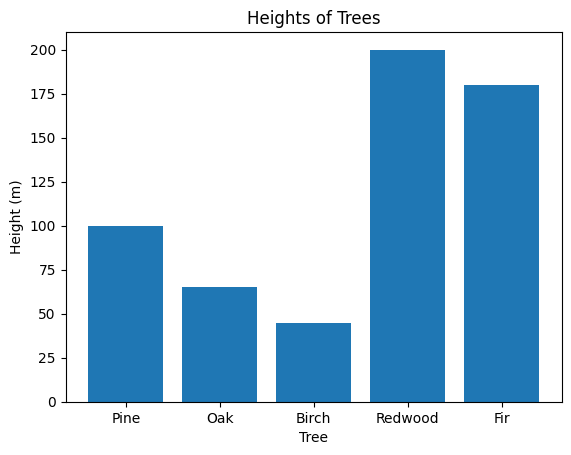

In [19]:
run_locally(response)

# Step 1: Retrieve the Data

You'll be using the New York City 311 dataset, which contains citizen [complaints and reports](https://portal.311.nyc.gov/report-problems/) of non-emergency issues (e.g., illegal parking, noise, parties, leaking fire hydrants, damaged buildings, broken streetlights, etc.).

This data is [hosted publicly on BigQuery](https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-311). Using the BigQuery API, download a sample of the dataset:

In [20]:
from google.cloud import bigquery

client = bigquery.Client(project=PROJECT_ID)

QUERY = ("""
  SELECT
    unique_key,
    created_date,
    closed_date,
    agency,
    agency_name,
    complaint_type,
    descriptor,
    location_type,
    incident_zip,
    incident_address,
    street_name,
    cross_street_1,
    cross_street_2,
    intersection_street_1,
    intersection_street_2,
    address_type,
    status,
    resolution_description,
    community_board,
    borough,
    park_facility_name,
    open_data_channel_type,
    taxi_pickup_location,
    bridge_highway_name,
    bridge_highway_direction,
    bridge_highway_segment
  FROM `bigquery-public-data.new_york_311.311_service_requests`
  WHERE rand() < .0015
  """)
query_job = client.query(QUERY)
df_311 = query_job.to_dataframe()

Check how many rows you sampled and take a peek at the data.

In [21]:
len(df_311)

40706

In [22]:
df_311.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,status,resolution_description,community_board,borough,park_facility_name,open_data_channel_type,taxi_pickup_location,bridge_highway_name,bridge_highway_direction,bridge_highway_segment
0,19040342,2010-11-03 00:00:00+00:00,2010-11-12 00:00:00+00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11414,133-20 EMERALD STREET,EMERALD STREET,133 AVENUE,DUMONT AVENUE,None,None,ADDRESS,Closed,The Department of Housing Preservation and Dev...,0 Unspecified,Unspecified,Unspecified,UNKNOWN,None,None,None,None
1,18439937,2010-08-08 00:00:00+00:00,2010-08-12 00:00:00+00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,MOLD,RESIDENTIAL BUILDING,11422,138-36 247 STREET,247 STREET,SOUTH CONDUIT AVENUE,139 AVENUE,None,None,ADDRESS,Closed,The Department of Housing Preservation and Dev...,0 Unspecified,Unspecified,Unspecified,UNKNOWN,None,None,None,None
2,18651125,2010-09-09 00:00:00+00:00,2010-10-04 00:00:00+00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,MOLD,RESIDENTIAL BUILDING,11415,83-09 TALBOT STREET,TALBOT STREET,LEFFERTS BOULEVARD,83 DRIVE,None,None,ADDRESS,Closed,The Department of Housing Preservation and Dev...,0 Unspecified,Unspecified,Unspecified,UNKNOWN,None,None,None,None
3,18284854,2010-07-17 00:00:00+00:00,2010-08-09 00:00:00+00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,TOILET,RESIDENTIAL BUILDING,11420,115-30 125 STREET,125 STREET,115 AVENUE,116 AVENUE,None,None,ADDRESS,Closed,The Department of Housing Preservation and Dev...,0 Unspecified,Unspecified,Unspecified,UNKNOWN,None,None,None,None
4,18624735,2010-09-04 00:00:00+00:00,2010-09-11 00:00:00+00:00,HPD,Department of Housing Preservation and Develop...,NONCONST,VERMIN,RESIDENTIAL BUILDING,11369,32-40 93 STREET,93 STREET,32 AVENUE,NORTHERN BOULEVARD,None,None,ADDRESS,Closed,The Department of Housing Preservation and Dev...,0 Unspecified,Unspecified,Unspecified,UNKNOWN,None,None,None,None


As mentioned earlier in this notebook under Useful Tips, Code Interpreter is stateless. This means that you have to provide your data to Code Interpreter with each call.

To facilitate this, we'll pickle and compress our DataFrame, making it smaller and more portable.

In [23]:
df_311.to_pickle('311_dataframe.pkl', compression="zip")

Note that when using Code Interpreter with data files prepared in a specific way, you have to tell Code Interpreter how to access the data. You'll see this in the rest of this notebook, where we instruct Code Interpreter on how to decompress the pickled DataFrame.

# Step 2: Clean the Data

The 311 data is relatively clean, but there are still some issues you'll want to address.

## Assign Column Types

Take a look at the column types pandas assumed when generating a DataFrame from the imported data:

In [24]:
df_311.dtypes

unique_key                                Int64
created_date                datetime64[us, UTC]
closed_date                 datetime64[us, UTC]
agency                                   object
agency_name                              object
complaint_type                           object
descriptor                               object
location_type                            object
incident_zip                             object
incident_address                         object
street_name                              object
cross_street_1                           object
cross_street_2                           object
intersection_street_1                    object
intersection_street_2                    object
address_type                             object
status                                   object
resolution_description                   object
community_board                          object
borough                                  object
park_facility_name                      

Most of these columns are text, but many are categorical. And while having them as a pandas objects (which are pointers to strings) won't break anything, it's suboptimal. To save space and ease working with the data, we'll use Code Interpreter to assign more appropriate types based on the BigQuery schema.

First, retrieve the BigQuery schema and save it locally as `schema.json`:

In [25]:
table = client.get_table('bigquery-public-data.new_york_311.311_service_requests')
schema_file = open("schema.json", "w")
client.schema_to_json(table.schema, schema_file)
schema_file.close()

The BigQuery schema file is a JSON with field names and types:

In [26]:
!head -30 schema.json

[
  {
    "description": "",
    "mode": "NULLABLE",
    "name": "unique_key",
    "type": "INTEGER"
  },
  {
    "description": "",
    "mode": "NULLABLE",
    "name": "created_date",
    "type": "TIMESTAMP"
  },
  {
    "description": "",
    "mode": "NULLABLE",
    "name": "closed_date",
    "type": "TIMESTAMP"
  },
  {
    "description": "",
    "mode": "NULLABLE",
    "name": "agency",
    "type": "STRING"
  },
  {
    "description": "",
    "mode": "NULLABLE",
    "name": "agency_name",
    "type": "STRING"


Send the `schema.json` file to Code Interpreter along with the pickled DataFrame, and provide Code Interpreter instructions on:
1. How to uncompress the DataFrame.
2. How to use the included schema JSON.
3. How you'd like to decide between categorical columns and regular strings.
4. How you'd like BigQuery data types cast (in this case, we want to use StringDtype explictly, pandas defaults to `object` for columns cast to strings).

You'll see in the example below that Code Interpreter is instructed to ignore UserWarnings. This is related to casting StringDType with more recent versions of pandas on data that isn't necessarily strings. The `run_code_interpreter` method will retry code that throws errors, but since the pandas warnings are non-fatal we don't want to retry code that only has warnings in this particular case.

You may have to rerun this Code Interpreter call, it asks Code Interpreter to do many things so it can malfunction in many ways. While you'd have easier success breaking this Code Interpreter call into a few separate calls (say, setting types from the schema first, then setting strings to StringDType, then creating categories), it's just not as much fun!

In [28]:
QUERY = """
The attached pkl file has a DataFrame where some of the column types are wrong.
First, load the pickled DataFrame. The pickled DataFrame was saved with the compression set to zip.
Use the warnings library to supress all category=UserWarning.
Use the attached BigQuery schema JSON file to set the columns to the correct pandas dtype.
Don't import any special Google Cloud libraries to read the schema JSON.
The JSON is a list of columns, where the 'name' field is the name of the column and the 'type' field is the BigQuery type.
Not all columns in the schema are in the DataFrame, do not set the types of columns not in the DataFrame.
Before setting a column's type make sure the column exists in the DataFrame.
Set string columns explicitly to pandas pd.StringDType.
Set string columns with fewer than 200 unique values as the category type.
Return a pickle of the DataFrame in a file called "311_dataframe_typed.pkl".
Save the pickled DataFrame with zip compression.
"""
response = run_code_interpreter(QUERY, ['311_dataframe.pkl', 'schema.json'])
process_response(response)

Now compare the new column types to the original types you saw above.

To do this, load the `311_dataframe_typed.pkl` file Code Interpreter returned (saved automatically by the `run_code_interpreter` helper function) and inspect the types:

In [29]:
df_311_typed = pd.read_pickle('311_dataframe_typed.pkl', compression='zip')
df_311_typed.dtypes

unique_key                                int64
created_date                datetime64[us, UTC]
closed_date                 datetime64[us, UTC]
agency                                 category
agency_name                            category
complaint_type                   string[python]
descriptor                       string[python]
location_type                          category
incident_zip                     string[python]
incident_address                 string[python]
street_name                      string[python]
cross_street_1                   string[python]
cross_street_2                   string[python]
intersection_street_1            string[python]
intersection_street_2            string[python]
address_type                           category
status                                 category
resolution_description           string[python]
community_board                        category
borough                                category
park_facility_name               string[

You can see the types are now hopefully closer to the actual data. Do note that it's possible Code Interpreter misses some conversions--you'll want to rerun the code if you don't see a handful of category types and string types, and it's very important that the `created_date` and `closed_date` fields are datetime64 types.

## Clean Up `created_date`

Take a look at a plot showing the distribution of hour of the day that 311 issues are filed:

In [31]:
QUERY = """
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
Create a line graph showing the distribution of complaints by hour the of day.
The 'created_date' field contains the datetime value the complaint was created.
The Y axis is the count of complaints.
The X axis is the hour of the day.
Title the plot and the axes.
"""
response = run_code_interpreter(QUERY,['311_dataframe_typed.pkl'])
process_response(response)

There's a very high number of 311 issue created during the first hour of the day, from midnight to 1AM. This is because issues created a certain way are assigned a time of midnight. Ask Code Interpreter to remove these 311 issues created exactly at midnight.

In [32]:
QUERY = """
First, load the pickled DataFrame. The pickled DataFrame was saved with the compression set to zip.
Print the number of rows of the DataFrame.
Remove all rows created exactly at midnight (to the second).
The test for midnight is rows with an hour of 0, minute of 0, and second of 0.
Meaning, a row needs either an hour not 0, a minute not 0, or a second not 0 to be kept.
The column 'created_date' holds the creation time.
Print the number of rows of the DataFrame.
Then return a pickle of the DataFrame in a file called '311_dataframe_nomidnight.pkl'.
Save the new DataFrame pickle with zip compression.
"""
response = run_code_interpreter(QUERY,['311_dataframe_typed.pkl'])
process_response(response)

To make sure the cleaning worked, take a look at the distribution of issue creation times in the new DataFrame.

In [33]:
QUERY = """
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
Create a line graph showing the distribution of complaints by hour the of day.
The 'created_date' field contains the datetime value the complaint was created.
The Y axis is the count of complaints.
The X axis is the hour of the day.
Title the plot and the axes.
"""
response = run_code_interpreter(QUERY,['311_dataframe_nomidnight.pkl'])
process_response(response)

# Step 3: Augment the Data

Code Interpreter can also help with augmenting pandas data. In this call, you'll add additional columns to the DataFrame based on existing columns.

In [34]:
QUERY = """
The attached pkl file has a DataFrame of citizen complaints.
The DataFrame will be used to analyze timing around complaint creation and resolution.
To make this easier, create additional columns breaking the time fields down.
First, load the pickled DataFrame. The pickled DataFrame was saved with the compression set to zip.
From the 'created_date' datetime column, create new columns for the year, month, day, hour, minute, and second.
These columns should be named like 'created_year', 'created_month', etc.
Do the same for the 'closed_date' column.
Then return a pickle of the DataFrame in a file called '311_dataframe_augmented.pkl'.
Save the new DataFrame pickle with zip compression.
"""
response = run_code_interpreter(QUERY, ['311_dataframe_nomidnight.pkl'])
process_response(response)

Note the new columns now in the DataFrame:

In [35]:
df_311_augmented = pd.read_pickle("311_dataframe_augmented.pkl", compression="zip")
df_311_augmented.columns

Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_type',
       'status', 'resolution_description', 'community_board', 'borough',
       'park_facility_name', 'open_data_channel_type', 'taxi_pickup_location',
       'bridge_highway_name', 'bridge_highway_direction',
       'bridge_highway_segment', 'created_year', 'created_month',
       'created_day', 'created_hour', 'created_minute', 'created_second',
       'closed_year', 'closed_month', 'closed_day', 'closed_hour',
       'closed_minute', 'closed_second'],
      dtype='object')

# Step 4: Sample the Data

Sometimes you may want to sample your data. Code Interpreter can help with this as well.

In [36]:
QUERY = """
First, load the pickled DataFrame. The pickled DataFrame was saved with the compression set to zip.
Randomly sample 20% of the dataset.
Then return a pickle of the DataFrame in a file called '311_dataframe_sampled.pkl'.
Save the new DataFrame pickle with zip compression.
"""
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

Look at the length of the DataFrames to see the impact of the sampling

In [37]:
len(df_311_augmented)

35130

In [38]:
df_311_sampled = pd.read_pickle('311_dataframe_sampled.pkl', compression='zip')
len(df_311_sampled)

7026

## More Complex Sampling

Code Interpreter can also handle more complex sampling requests. Though the more complex the request (and the more complex pandas operations required) the more likely Code Interpreter needs a few retries--remember, the more difficult it would be for a person the more difficult it is for a generative AI model.

You'll see in the example below that Code Interpreter is instructed to ignore FutureWarnings and DeprecationWarnings. This is because Code Interpreter favors pandas `groupby` to sample, and there's future pandas changes that will break common ways of using `groupby`. The `run_code_interpreter` method will retry code that throws errors, but since the pandas warnings are non-fatal we don't want to retry code that only has warnings in this particular case.

In [40]:
QUERY = """
Use the warnings library to supress all category=FutureWarning and DeprecationWarning.
Load the pickled DataFrame. The pickled DataFrame was saved with the compression set to zip.
Create a sample of about 1000 rows.
The sample should have a roughly equal number of rows for each unique value in the 'borough' column.
Count the unique values in the 'borough' column and use that to determine how many rows to sample from each borough.
Then return a pickle of the DataFrame in a file called '311_dataframe_borough_sample.pkl'.
Save the new DataFrame pickle with zip compression.
"""
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

Make some plots showing how the sample changed the distribution of boroughs in the dataset. First, look at the data before sampling:

In [41]:
QUERY = """
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
Create a horizontal bar graph showing the distribution of complaints by the 'borough' field.
The Y axis is the borough.
The X axis is the number of complaints.
Title the plot and the X axis.
Do not title the Y axis.
Make sure the plot is wide enough to show the Y axis labels.
"""
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

Now look at the distribution of boroughs in the sample:

In [43]:
QUERY = """
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
Create a horizontal bar graph showing the distribution of complaints by the 'borough' field.
The Y axis is the borough.
The X axis is the number of complaints.
Title the plot and the X axis.
Do not title the Y axis.
Make sure the plot is wide enough to show the Y axis labels.
"""
response = run_code_interpreter(QUERY, ['311_dataframe_borough_sample.pkl'])
process_response(response)

# Step 5: Analyze the Data

Next, use Code Interpreter to generate some plots.

To make this easier, you'll provide Code Interpreter with an example of the data and other additional information about the data as necessary.

The pandas `head` method makes it easy to output a few pandas rows, but if your dataframe is wide pandas won't show some columns. To get around this, set pandas `display.max_columns` to not skip columns when printing:

In [44]:
pd.set_option('display.max_columns', None)

Use Code Interpreter to create a plot of the most common complaint types. To help Code Interpreter do this, provide the `head` of the DataFrame along with the unique complaint types.

In [45]:
df_311_augmented = pd.read_pickle('311_dataframe_augmented.pkl', compression='zip')

In [49]:
QUERY = """
The attached pkl file is a DataFrame of citizen complaints.
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
Create a horizontal bar plot showing the most common complaint types.
Your plot should only show about 10 types.
Don't show raw compliant counts, show as a percentage of total compliants.
Title the plot and the X axis.
The compliant types should be on the Y axis.
Make sure the image is wide enough to show all the Y axis labels.
Here is the head() of the DataFrame:\n {}\n
Here are the unique complaint types: {}
""".format(df_311_augmented.head(),
           df_311_augmented['complaint_type'].unique().tolist())
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

Next, let's do some analysis of complaints having to do with "vermin". Let code interpreter decide what complaint categories correspond to vermin.

In [50]:
QUERY = """
The attached pkl file is a DataFrame of citizen complaints.
Use the warnings library to supress all category=FutureWarning.
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
You are going to do analysis of complaints related to vermin.
Consider the different kinds of complaints, and determine the complaint types that have to do with vermin. Here are the unique complaint types:{}
Be generous with your definition of vermin, there are multiple relevant complaint types.
Print the number of complaints that have to do with vermin.
Then, create a horizontal bar plot showing the counts of the different vermin-related complaint types.
Title the plot and the X axis.
The compliant types should be on the Y axis.
Make sure the image is wide enough to show all the Y axis labels.
Here is the head() of the dataframe {}:
""".format(
    df_311_augmented['complaint_type'].unique().tolist(),
    df_311_augmented.head())
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

You may find it interesting to rerun the prompt above and see how Code Interpreter's idea of "vermin" changes.

Finally, let's use our augmented time fields to do some analysis of complaint creation times.

In [51]:
QUERY = """
The attached pkl file is a DataFrame of citizen complaints.
Use the warnings library to supress all category=FutureWarning.
First, load the pickled DataFrame. The pickled Dataframe was saved with the compression set to zip.
You are going to do analysis of the most common complaints by hour of the day, using the 'created_hour' field.
For each hour of the day, determine the most common complaint type.
Print out a report.
Here is the head() of the dataframe {}:
""".format(df_311_augmented.head())
response = run_code_interpreter(QUERY, ['311_dataframe_augmented.pkl'])
process_response(response)

# Cleaning Up
In this tutorial you used Code Interpreter from Vertex AI Extensions to work with a Pandas DataFrame. You set data types, cleaned the data, augemented the data, explored ways to sample the data, and did some data analysis.

## Cleaning Up Extensions

Run the next code block to remove the extension you registered in this notebook.

In [ ]:
extension_code_interpreter.delete()

If you restarted the notebook runtime, you may have some stray registered Extensions. This next line of code shows you all the Extensions registered in your project:

In [ ]:
extensions.Extension.list()

You can use the [Google Cloud Console](https://console.cloud.google.com/vertex-ai/extensions) to view and delete any stray registered Extensions.

If you cant to delete all the extensions in your project, uncomment and run this code block. **WARNING**: This cannot be undone!

In [ ]:
"""
clean_ids = []

for element in extensions.Extension.list():
  clean_ids.append(str(element).split("extensions/")[1])

for id in clean_ids:
  extension = extensions.Extension(id)
  extension.delete()
"""

## Cleaning Up Local Files

If you used the `run_code_interpreter` helper function, you can quickly cleanup the files created by Code Interpreter. First, take a look at the file names created:

In [ ]:
print(set(CODE_INTERPRETER_WRITTEN_FILES))

If you don't want to keep any of these files, uncomment and run the next code block. **WARNING**: These files will all be deleted, and this cannot be undone.

In [46]:
# import os
# _ = [os.remove(filename) for filename in set(CODE_INTERPRETER_WRITTEN_FILES)
#      if os.path.isfile(filename)]

Uncomment to remove one more file created by this notebook:

In [ ]:
# os.remove('tree_data.csv')
# os.remove('schema.json')
# os.remove('311_dataframe.pkl')